In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os


**CLEANING DATA**

In [20]:
#Importing datafreame
df = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')


In [21]:
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
0,2012-09-28,16,51.40,3.789,2130.57,3.82,NaN,583.90,1409.43,6.061,False,27,836.65
1,2012-10-19,16,40.59,3.750,1278.03,NaN,1.16,16.38,1395.48,5.847,False,27,852.81
2,2012-10-26,16,40.99,3.686,2285.52,20.48,NaN,201.97,1237.41,5.847,False,27,815.95
3,2010-02-19,16,21.13,2.550,NaN,NaN,NaN,NaN,NaN,7.039,False,28,266.00
4,2010-02-26,16,18.12,2.586,NaN,NaN,NaN,NaN,NaN,7.039,False,28,255.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565963,2012-08-17,16,62.07,3.545,408.10,NaN,1.10,870.38,604.80,6.061,False,27,752.11
565964,2012-08-24,16,61.44,3.558,1556.47,16.00,3.34,869.05,1691.12,6.061,False,27,703.94
565965,2012-08-31,16,64.19,3.556,8702.40,NaN,35.78,3576.08,4493.67,6.061,False,27,614.79
565966,2012-09-14,16,56.69,3.659,5323.84,NaN,9.30,1307.03,4474.84,6.061,False,27,898.63


In [22]:

#df= df[(df["store"]== 45)]

In [23]:
df.shape

(565968, 13)

In [24]:
# Dropping the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Dropping the null rows
df = df.dropna()
df.head()
#Getting rid of space on FALSE_POSITIVES
df.replace(to_replace ="FALSE POSITIVE", 
                 value ="FALSE_POSITIVE",
          inplace=True)

In [25]:
df.shape

(149916, 13)

In [26]:
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
62,2011-11-11,16,29.56,3.505,5042.40,2193.04,200.11,3309.98,2743.18,6.232,False,28,468.42
63,2011-11-18,16,31.73,3.479,2089.46,154.21,3.55,830.60,4425.07,6.232,False,28,279.22
64,2011-11-25,16,31.39,3.424,90.28,126.47,34754.69,24.64,1560.32,6.232,True,28,349.09
66,2011-12-23,16,20.79,3.173,485.00,0.18,475.60,16.20,960.85,6.232,False,28,575.78
67,2011-12-30,16,23.91,3.119,921.67,11778.68,101.87,272.51,1673.25,6.232,True,28,685.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565957,2012-06-15,16,65.36,3.723,7027.33,141.80,125.91,642.76,1980.96,6.169,False,27,909.28
565958,2012-06-22,16,70.41,3.735,1291.33,201.00,0.27,696.47,1682.13,6.169,False,27,929.01
565960,2012-07-13,16,70.29,3.613,2375.53,17.90,2.07,983.30,1834.23,6.061,False,27,952.86
565961,2012-07-20,16,68.43,3.585,1115.42,105.35,4.69,196.54,948.69,6.061,False,27,799.20


In [27]:
#drop other unnecesary columns 
df.drop(inplace= True,columns=[ 'fuel_price','unemployment','dept'])

In [28]:
# Adding  column for year
df["year"] = pd.to_datetime(df["sale_date"], format="%Y-%m-%d").dt.year
df["year"] = pd.to_datetime(df["sale_date"], format="%Y-%m-%d").dt.year
 #Adding Column for month
df["month"] = pd.to_datetime(df["sale_date"], format="%Y-%m-%d").dt.month
df["month"] = pd.to_datetime(df["sale_date"], format="%Y-%m-%d").dt.month
df

,sale_date,store,temperature,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales,year,month
62,2011-11-11,16,29.56,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42,2011,11
63,2011-11-18,16,31.73,2089.46,154.21,3.55,830.60,4425.07,False,279.22,2011,11
64,2011-11-25,16,31.39,90.28,126.47,34754.69,24.64,1560.32,True,349.09,2011,11
66,2011-12-23,16,20.79,485.00,0.18,475.60,16.20,960.85,False,575.78,2011,12
67,2011-12-30,16,23.91,921.67,11778.68,101.87,272.51,1673.25,True,685.46,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...
565957,2012-06-15,16,65.36,7027.33,141.80,125.91,642.76,1980.96,False,909.28,2012,6
565958,2012-06-22,16,70.41,1291.33,201.00,0.27,696.47,1682.13,False,929.01,2012,6
565960,2012-07-13,16,70.29,2375.53,17.90,2.07,983.30,1834.23,False,952.86,2012,7
565961,2012-07-20,16,68.43,1115.42,105.35,4.69,196.54,948.69,False,799.20,2012,7


In [29]:
#Sort Values by date
df.sort_values(by='sale_date', inplace= True) 
df

,sale_date,store,temperature,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales,year,month
62,2011-11-11,16,29.56,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42,2011,11
147533,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,24848.39,2011,11
363402,2011-11-11,28,48.76,22860.64,12223.82,343.77,20834.37,9895.33,False,10305.28,2011,11
147629,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,23011.67,2011,11
147725,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,4116.93,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...
176418,2012-10-26,45,58.85,4018.91,58.08,100.00,211.94,858.33,False,1350.87,2012,10
67738,2012-10-26,26,46.95,1827.16,35.87,50.00,478.93,2088.65,False,5347.21,2012,10
383056,2012-10-26,31,70.50,10768.84,50.54,104.50,345.37,6629.51,False,137.84,2012,10
67546,2012-10-26,26,46.95,1827.16,35.87,50.00,478.93,2088.65,False,497.03,2012,10


In [30]:
#Replacing zeros
#Listing columns with potential 0s
zero_not_accepted = ['markdown1', 'markdown2', 'markdown3','markdown4','markdown5','weekly_sales']
#Replacing 0 with np.NaN, creating a mean using an integer from the column where we skip Nas (figuring out the mean of the dataset)
#Lastly, taking the dataset column and replacing all of the np NaNs with the mean.
#This will allow me to use the rest of my values for computation
for column in zero_not_accepted:
    df[column]= df[column].replace (0, np.NaN)
    mean= int(df[column].mean(skipna=True))
    df[column]= df[column].replace(np.NaN, mean)

In [31]:
#Group by store and create column for average sales 2011
year2011=  df[df["year"]==2011]
df_2011= pd.DataFrame(year2011.groupby("store")['weekly_sales'].mean())
df_2011
df_2011.rename(inplace= True, columns={'weekly_sales': 'Average_sales_2011'})
df_2011

,Average_sales_2011
store,
1,24808.650528
2,31892.746096
3,6274.005670
4,36566.827333
5,5660.444521
6,26638.591402
7,11102.370813
8,15448.273190
9,10085.997782


In [32]:
#Group by store and create column for average sales 2012
year2012=  df[df["year"]==2012]
df_2012= pd.DataFrame(year2012.groupby("store")['weekly_sales'].mean())
df_2012
df_2012.rename(inplace= True, columns={'weekly_sales': 'Average_sales_2012'})

**CREATING BAR CHART TO EVALUATE AVERAGE YEARLY SALES BY STORE**

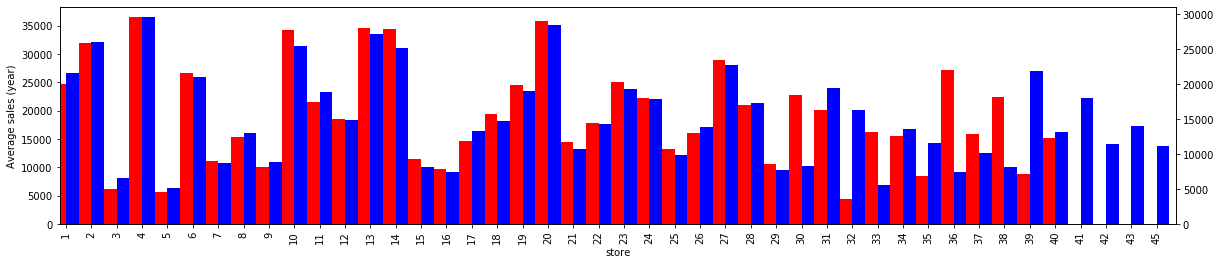

In [33]:
# Create Bar graph for average yearly sales per store
######YEARLY SALES
fig= plt.figure(figsize=(20,4)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5


df_2011.Average_sales_2011.plot(kind='bar', color='red', ax=ax, width=width, position=1, label="2011")
df_2012.Average_sales_2012.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="2012")

ax.set_ylabel('Average sales (year)')


plt.show()

From this bar graph I am gathering which stores have the greatest and least average yearly sales for the years 2011 
and 2012. I am chosing 5 stores for my machine learning linear regression off of this chart.
1.The top 2 stores with max sales
2.The top 2 stores with min sales
3.One store with average sales 

**PREPROCESSING**

In [34]:
#Use conditional to locate all rows after November 4th 2011
new_df = df.loc[df["sale_date"]> "2011-11-04" ]
new_df

,sale_date,store,temperature,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales,year,month
62,2011-11-11,16,29.56,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42,2011,11
147533,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,24848.39,2011,11
363402,2011-11-11,28,48.76,22860.64,12223.82,343.77,20834.37,9895.33,False,10305.28,2011,11
147629,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,23011.67,2011,11
147725,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,4116.93,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...
176418,2012-10-26,45,58.85,4018.91,58.08,100.00,211.94,858.33,False,1350.87,2012,10
67738,2012-10-26,26,46.95,1827.16,35.87,50.00,478.93,2088.65,False,5347.21,2012,10
383056,2012-10-26,31,70.50,10768.84,50.54,104.50,345.37,6629.51,False,137.84,2012,10
67546,2012-10-26,26,46.95,1827.16,35.87,50.00,478.93,2088.65,False,497.03,2012,10


In [36]:
#Checking how many unique values are there for months
new_df["month"].nunique()

12

In [37]:
# Get average of markdowns1-5 DataFrame rows (selected by index labels)
#new_df['markdownmean']= new_df[[ 'markdown1', 'markdown2', 'markdown3','markdown4','markdown5'] ].mean(axis=1)

In [38]:
#Selecting wanted columns
freshy= new_df.loc[:,['markdown1', 'markdown2', 'markdown3','markdown4','markdown5','weekly_sales','isholiday','store','temperature','month']] 
freshy.head()

,markdown1,markdown2,markdown3,markdown4,markdown5,weekly_sales,isholiday,store,temperature,month
62,5042.40,2193.04,200.11,3309.98,2743.18,468.42,False,16,29.56,11
147533,10215.77,4613.06,191.71,3200.57,4230.85,24848.39,False,40,40.75,11
363402,22860.64,12223.82,343.77,20834.37,9895.33,10305.28,False,28,48.76,11
147629,10215.77,4613.06,191.71,3200.57,4230.85,23011.67,False,40,40.75,11
147725,10215.77,4613.06,191.71,3200.57,4230.85,4116.93,False,40,40.75,11


In [39]:
# Use Pandas get_dummies to convert categorical data
pd.get_dummies(freshy)
freshy.head()


,markdown1,markdown2,markdown3,markdown4,markdown5,weekly_sales,isholiday,store,temperature,month
62,5042.40,2193.04,200.11,3309.98,2743.18,468.42,False,16,29.56,11
147533,10215.77,4613.06,191.71,3200.57,4230.85,24848.39,False,40,40.75,11
363402,22860.64,12223.82,343.77,20834.37,9895.33,10305.28,False,28,48.76,11
147629,10215.77,4613.06,191.71,3200.57,4230.85,23011.67,False,40,40.75,11
147725,10215.77,4613.06,191.71,3200.57,4230.85,4116.93,False,40,40.75,11


In [48]:
store4= freshy[freshy['store']==4]

In [49]:
# # Set features. This will also be used as your x values.
# #X values are my independent variables 
# X= store4[['markdown1', 'markdown2', 'markdown3','markdown4','markdown5','weekly_sales', 'month','store']]
# # Y is my Dependent variable
# y= store4[['isholiday']].values.reshape(-1, 1)
# print(X.shape, y.shape)

(4318, 8) (4318, 1)


**SPLITTING AND SCALING DATA**

In [57]:
# Set features. This will also be used as your x values.
#X values are my independent variables 
X= freshy[['markdown1', 'markdown2', 'markdown3','markdown4','markdown5','weekly_sales', 'month','store']]
# Y is my Dependent variable
y= freshy[['isholiday']].values.reshape(-1, 1)
print(X.shape, y.shape)

(149916, 8) (149916, 1)


In [58]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [59]:
from sklearn.preprocessing import StandardScaler

#Creating a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [60]:
# Transforming the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [61]:
 # Creating a LinearRegression model and fitting it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

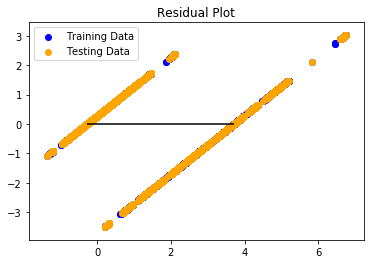

In [62]:
# Making predictions using a fitted model
# Plotting the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [63]:
 # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2


from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.27544274284078213, R2: 0.7205260112816716


## ANALYSIS

**R2**
* The R2 result in this model shows that 72% of the variance in whether it is a holiday or not is explained by markdowns and weekly sales.


**Mean Standard Error**
* The MSE in this model shows that there is only 27% error.

In [ ]:
#Variance In terms of linear regression, 
#variance is a measure of how far observed values differ from the average of predicted values,
#i.e., their difference from the predicted value mean.
#The goal is to have a value that is low. What low means is quantified by the r2 score 
#In the code below, this is np.var(err), 
#where err is an array of the differences between observed 
#and predicted values and np.var() is the numpy array variance function.

# R2= the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#0% indicates that the model explains none of the variability of the response data around its mean.
#100% indicates that the model explains all the variability of the response data around its mean.

In [ ]:
#MSE  MSE. Simply put, the lower the value the better and 0 means the model is perfect.
#is the average of the square of the errors.